In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [2]:
sys.path.append("../")

In [3]:
from nupyk import models, utils

In [4]:
xgb_trainer = models.XGBTrainer()

In [5]:
xgb_trainer.load_pickle_data("output/all_sources_processed.pkl")

In [ ]:
xgb_trainer.dataframe.head()

In [ ]:
model_settings = {
    "n_estimators": 1000,
    "learning_rate": 0.03,
    "objective": "reg:squarederror",
}

In [ ]:
xgb_trainer.def_model(model_settings)

In [ ]:
xgb_trainer.model

In [6]:
xgb_trainer.process()

In [ ]:
xgb_trainer.fit_model()

In [ ]:
xgb_trainer.save_model("test_model")

In [7]:
xgb_test = models.XGBTrainer()

In [8]:
xgb_test.load_pickle_model("models/test_model.pkl")

In [9]:
test_model = xgb_test.model

In [10]:
prediction = test_model.predict(xgb_trainer._x_test)

In [11]:
target = xgb_trainer._target_test

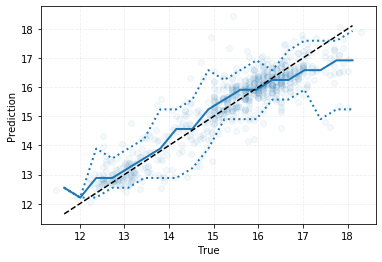

In [12]:
fig, ax = plt.subplots()
ax = utils.PredVsTargetPlot(ax, prediction, target)